In [23]:
import json
import numpy as np
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
fpath = "/home/b/Downloads/plotholes-4daba-export(6).json"
with open (fpath) as f:
    json_content = json.loads(f.read())

In [25]:
all_readings = []
all_acc_df = {}
all_gyro_df = {}

for key in json_content:
    if key == 'potholes':
        continue
    val = json_content[key]
    acc_readings = json.loads(val.get('acc',[]))    
    if not acc_readings: 
        print ("empty:",key)
        # Skip logs without any accelerometer readings
        continue 
    
    
    start_epoch = float(acc_readings[0]['timestamp'])    
    start_time = time.strftime('%m-%d %H:%M:%S', time.localtime(start_epoch))
    gyro_readings = json.loads(val.get('gyro',[]))
    if abs(len(gyro_readings)*10 - len(acc_readings)) <= 30:
        tag = 'viz'
    elif abs(len(gyro_readings) - len(acc_readings)) <= 20:
        tag = 'shr'
    elif len(gyro_readings) == 0:
        continue
    else :
        tag = 'na'
    all_readings.append([start_time,len(acc_readings),len(gyro_readings),tag])
    acc_df = pd.DataFrame(acc_readings).astype(np.float32)
    gyro_df = pd.DataFrame(gyro_readings).astype(np.float32) if gyro_readings else None

all_readings.sort(key=lambda x : x[0])
print (len(all_readings))

87


In [26]:
pd.DataFrame(all_readings)

,0,1,2,3
0,01-18 21:01:22,129,129,shr
1,01-18 21:04:49,294,294,shr
2,01-18 21:05:57,169,168,shr
3,01-18 21:06:52,252,251,shr
4,01-18 21:08:14,257,256,shr
5,01-18 21:09:52,145,143,shr
6,01-18 21:13:09,127,126,shr
7,01-18 21:13:56,230,229,shr
8,01-18 21:14:59,82,81,shr
9,01-18 21:15:42,22,23,shr


## Plots

In [27]:
start_time_list = []
all_acc_df = {}

all_gyro_df = {}

for key in json_content:
    val = json_content[key]
    
    try:
        acc_readings = json.loads(val.get('acc',[]))    
    except:
        continue
        
    if not acc_readings: 
        # Skip logs without any accelerometer readings
        continue 
    
    
    start_epoch = float(acc_readings[0]['timestamp'])    
    start_time = time.strftime('%m-%d %H:%M:%S', time.localtime(start_epoch))
    gyro_readings = json.loads(val.get('gyro',[]))
    start_time_list.append([start_time,len(acc_readings),len(gyro_readings)])
    acc_df = pd.DataFrame(acc_readings).astype(np.float32)
    gyro_df = pd.DataFrame(gyro_readings).astype(np.float32) if gyro_readings else None
    
    # Basic Viz
    # acc_df.drop(['pothhole', 'speedbreaker', 'timestamp'], axis=1, inplace=True)
    # acc_df = acc_df.astype(np.float32)
    # gyro_df = gyro_df.astype(np.float32)
    all_acc_df[start_time] = acc_df
    all_gyro_df[start_time] = gyro_df
    
start_time_list.sort(key=lambda x : x[0])
#print (len(all_readings))

In [28]:
start_time_list

[['01-18 21:01:22', 129, 129],
 ['01-18 21:04:49', 294, 294],
 ['01-18 21:05:57', 169, 168],
 ['01-18 21:06:52', 252, 251],
 ['01-18 21:08:14', 257, 256],
 ['01-18 21:09:52', 145, 143],
 ['01-18 21:13:09', 127, 126],
 ['01-18 21:13:56', 230, 229],
 ['01-18 21:14:59', 82, 81],
 ['01-18 21:15:42', 22, 23],
 ['01-18 21:16:03', 174, 174],
 ['01-18 21:18:03', 187, 187],
 ['01-18 21:18:30', 8840, 882],
 ['01-18 21:18:46', 541, 539],
 ['01-18 21:20:55', 222, 220],
 ['01-18 21:21:03', 8469, 846],
 ['01-18 21:21:51', 101, 102],
 ['01-18 21:22:16', 9867, 984],
 ['01-18 21:22:21', 123, 122],
 ['01-18 21:22:56', 317, 316],
 ['01-18 21:24:01', 10632, 1065],
 ['01-18 21:25:39', 9186, 918],
 ['01-18 21:27:32', 2403, 243],
 ['01-18 21:28:11', 4095, 411],
 ['01-18 21:28:50', 1404, 141],
 ['01-18 21:30:29', 1995, 198],
 ['01-18 21:31:13', 4470, 447],
 ['01-18 21:34:07', 339, 34],
 ['01-18 23:11:25', 262, 261],
 ['01-18 23:12:34', 347, 346],
 ['01-18 23:13:51', 188, 187],
 ['01-18 23:14:35', 75, 75],
 ['

In [29]:
def smooth(x,window_len=5,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return pd.Series(x)

In [36]:
def plot_graphs(inds,deriv=False,smooth_window=4):
    num_plots = len(inds)
    fig, ax = plt.subplots(num_plots, 3, figsize=(20, num_plots*5))
    print ([start_time_list[j] for j in inds])
    for i, start_time in enumerate([start_time_list[j] for j in inds]):

        start_time = start_time[0]
        viz_acc_df = all_acc_df[start_time]
        viz_gyro_df = all_gyro_df[start_time]
        if deriv:
            ax[i,0].plot(smooth(viz_acc_df['acc_x'],window_len=smooth_window).diff(), label='acc_x')
            ax[i,0].plot(smooth(viz_acc_df['acc_y'],window_len=smooth_window).diff(), label='acc_y')
            ax[i,0].plot(smooth(viz_acc_df['acc_z'],window_len=smooth_window).diff(), label='acc_z')
        else:
            ax[i,0].plot(smooth(viz_acc_df['acc_x'],window_len=smooth_window), label='acc_x')
            ax[i,0].plot(smooth(viz_acc_df['acc_y'],window_len=smooth_window), label='acc_y')
            ax[i,0].plot(smooth(viz_acc_df['acc_z'],window_len=smooth_window), label='acc_z')
        ax[i,0].plot(viz_acc_df['speedbreaker'], label='speedbreaker')
        ax[i,0].plot(viz_acc_df['pothhole'], label='pothole', color='black')
        #ax[i,0].plot(viz_acc_df['accident'], label='accident', color='purple')
        ax[i,0].legend()
        ax[i,0].set_title(inds[i])
        
        if deriv:
            ax[i,1].plot(smooth(viz_gyro_df['gyro_x'],window_len=smooth_window).diff(), label='gyro_x')
            ax[i,1].plot(smooth(viz_gyro_df['gyro_y'],window_len=smooth_window).diff(), label='gyro_y')
            ax[i,1].plot(smooth(viz_gyro_df['gyro_z'],window_len=smooth_window).diff(), label='gyro_z')
        else:
            ax[i,1].plot(smooth(viz_gyro_df['gyro_x'],window_len=smooth_window), label='gyro_x')
            ax[i,1].plot(smooth(viz_gyro_df['gyro_y'],window_len=smooth_window), label='gyro_y')
            ax[i,1].plot(smooth(viz_gyro_df['gyro_z'],window_len=smooth_window), label='gyro_z')            
        ax[i,1].plot(viz_gyro_df['speedbreaker'], label='speedbreaker')
        ax[i,1].plot(viz_gyro_df['pothhole'], label='pothole', color='black')
        #ax[i,1].plot(viz_acc_df['accident'], label='accident', color='purple')
        ax[i,1].legend()
        ax[i,1].set_title(str(start_time_list[i]))

        ax[i,2].plot(viz_gyro_df['speedbreaker'], label='speedbreaker')
        ax[i,2].plot(viz_gyro_df['pothhole'], label='pothole')
        #ax[i,0].plot(viz_acc_df['accident'], label='accident')
        ax[i,2].legend()
        ax[i,2].set_title(str(start_time_list[i]))

[['01-19 17:58:20', 206, 214], ['01-19 18:02:16', 111, 112], ['01-19 18:02:54', 114, 114], ['01-19 18:03:27', 116, 116], ['01-19 18:04:10', 118, 120], ['01-19 18:04:50', 134, 135], ['01-19 18:32:45', 108, 109], ['01-19 18:34:04', 106, 106], ['01-19 18:34:44', 101, 100], ['01-19 18:35:18', 118, 117], ['01-19 18:36:20', 107, 106], ['01-19 18:36:55', 132, 130], ['01-19 18:37:29', 110, 109], ['01-19 18:38:04', 119, 118], ['01-19 18:39:38', 126, 127], ['01-19 19:00:48', 81, 80], ['01-19 19:01:44', 89, 89], ['01-19 19:02:54', 112, 111], ['01-19 19:03:26', 92, 92], ['01-19 19:03:56', 102, 102], ['01-19 19:04:54', 110, 109], ['01-19 19:05:44', 190, 157]]


KeyError: 'accident'

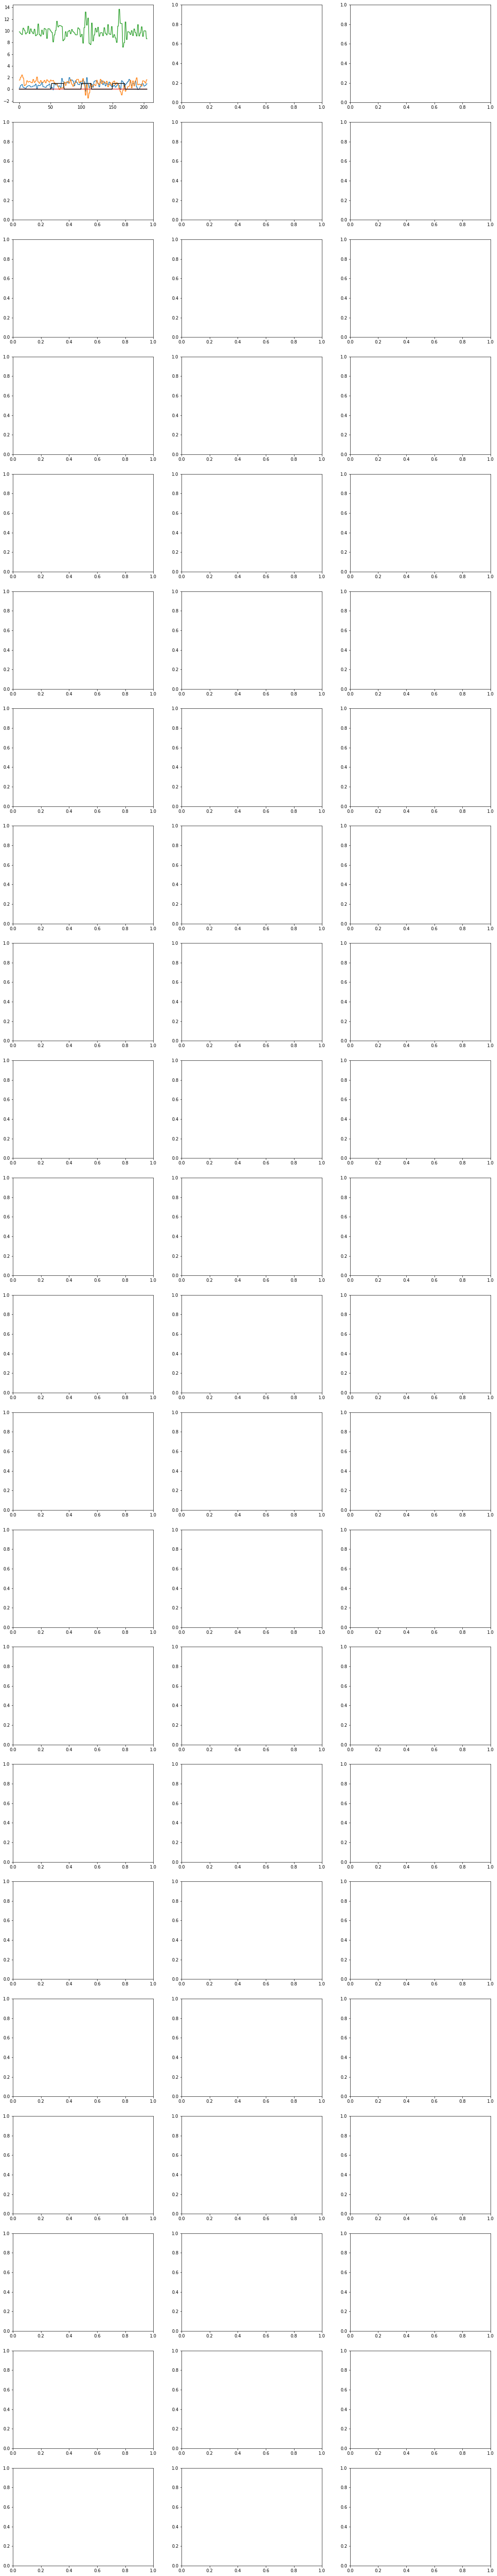

In [31]:
# SPEED BREAKER
plot_graphs(range(53,75))

[['01-18 21:30:29', 1995, 198], ['01-18 21:31:13', 4470, 447], ['01-18 21:34:07', 339, 34], ['01-18 23:11:25', 262, 261], ['01-18 23:12:34', 347, 346], ['01-18 23:13:51', 188, 187], ['01-18 23:14:35', 75, 75], ['01-18 23:14:54', 38, 38]]


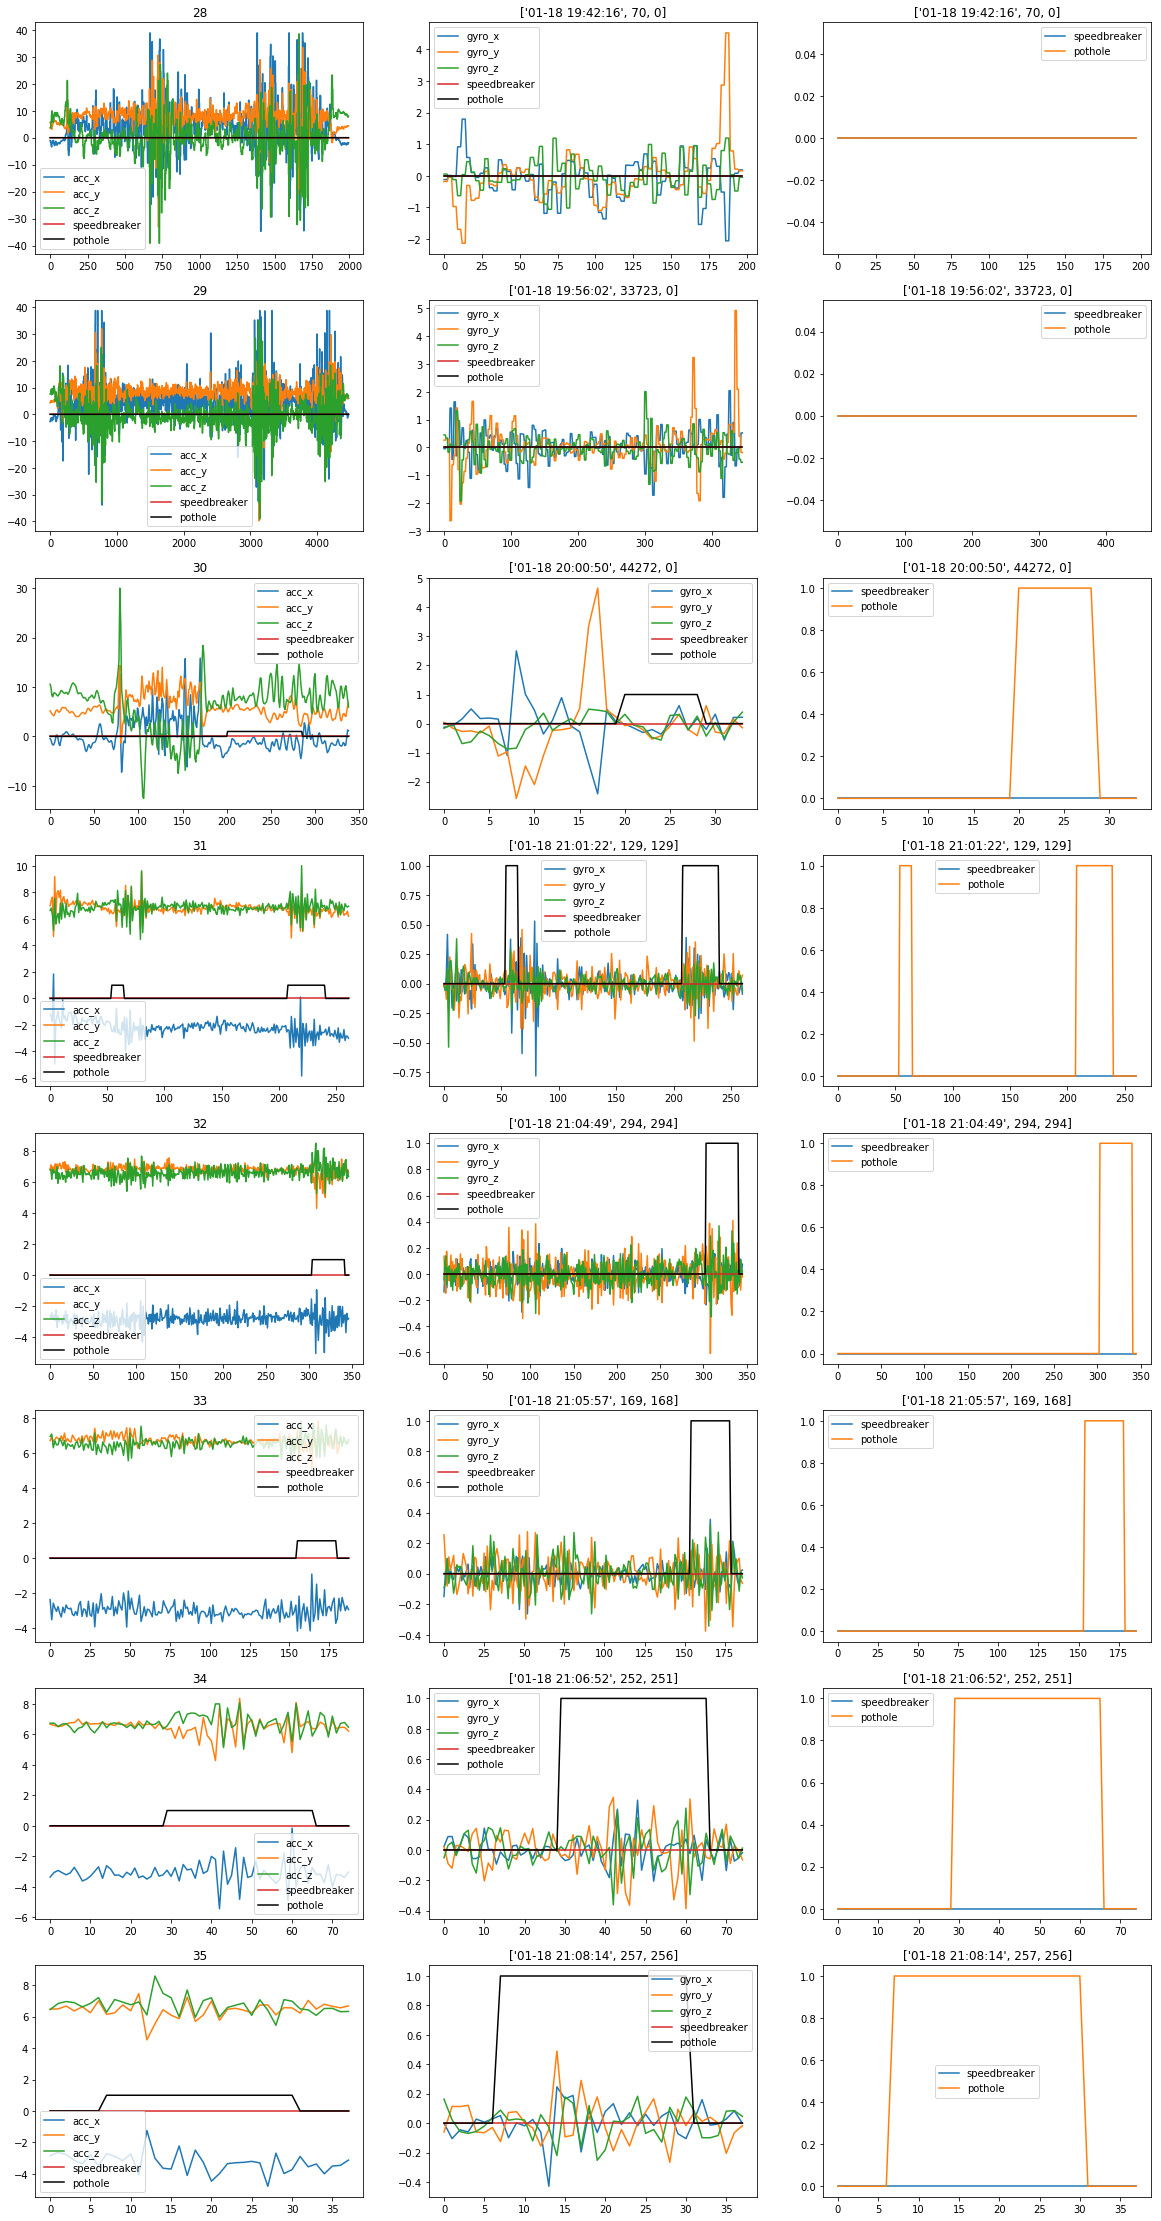

In [12]:
# POTHOLES
plot_graphs(range(28,36),deriv=False)

[['01-19 18:03:27', 116, 116], ['01-19 18:04:10', 118, 120], ['01-19 18:04:50', 134, 135], ['01-19 18:32:45', 108, 109], ['01-19 18:34:04', 106, 106], ['01-19 18:34:44', 101, 100], ['01-19 18:35:18', 118, 117], ['01-19 18:36:20', 107, 106], ['01-19 18:36:55', 132, 130], ['01-19 18:37:29', 110, 109], ['01-19 18:38:04', 119, 118], ['01-19 18:39:38', 126, 127], ['01-19 19:00:48', 81, 80], ['01-19 19:01:44', 89, 89]]


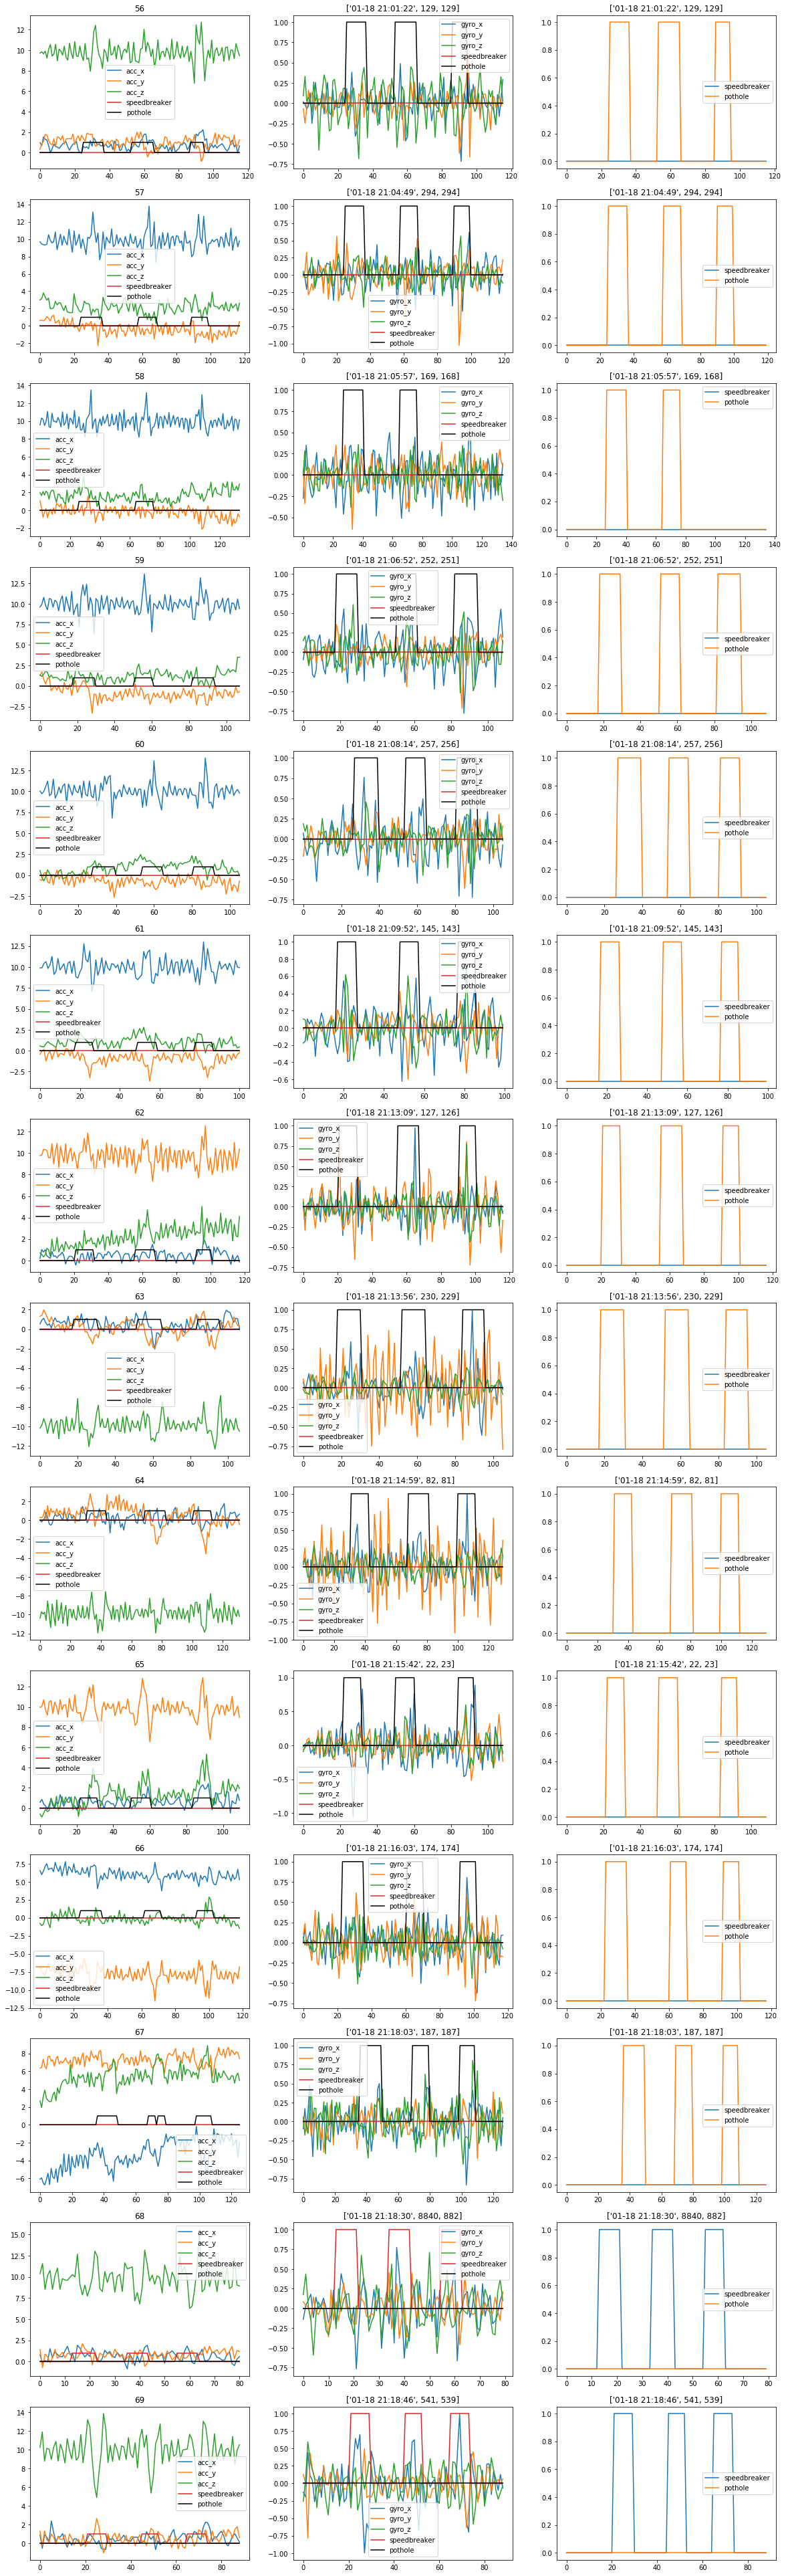

In [37]:
plot_graphs(range(56,70),deriv=False,smooth_window=1)

[['01-20 06:41:54', 106, 106], ['01-20 06:42:14', 60, 62]]


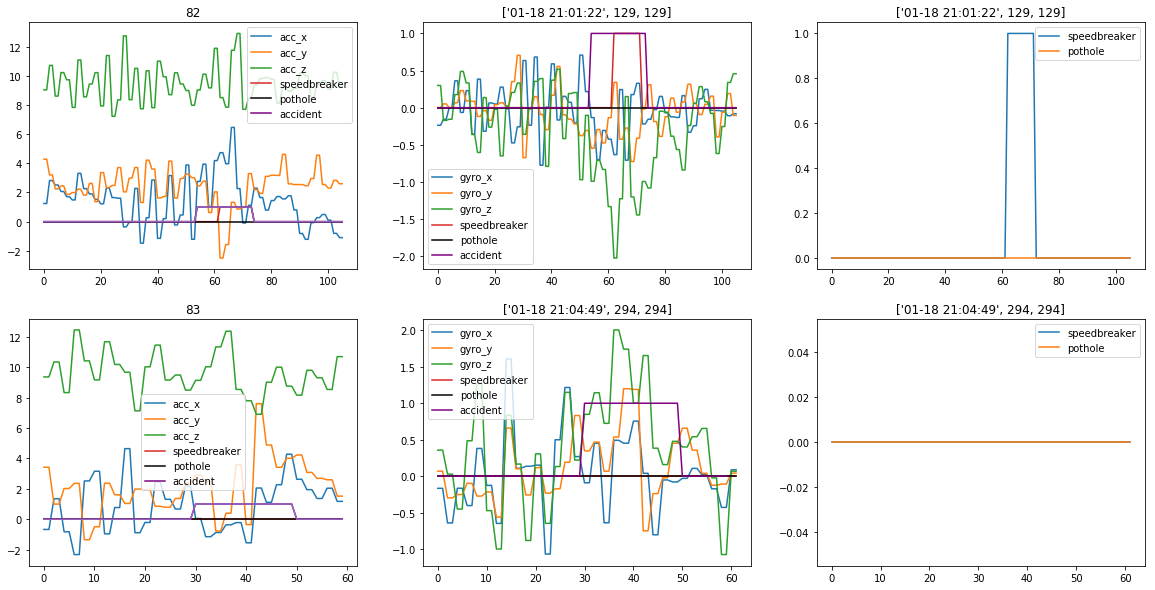

In [34]:
plot_graphs(range(82,84),deriv=False,smooth_window=1)

In [19]:
len(start_time_list)

87

In [20]:
start_time_list

[['01-18 21:01:22', 129, 129],
 ['01-18 21:04:49', 294, 294],
 ['01-18 21:05:57', 169, 168],
 ['01-18 21:06:52', 252, 251],
 ['01-18 21:08:14', 257, 256],
 ['01-18 21:09:52', 145, 143],
 ['01-18 21:13:09', 127, 126],
 ['01-18 21:13:56', 230, 229],
 ['01-18 21:14:59', 82, 81],
 ['01-18 21:15:42', 22, 23],
 ['01-18 21:16:03', 174, 174],
 ['01-18 21:18:03', 187, 187],
 ['01-18 21:18:30', 8840, 882],
 ['01-18 21:18:46', 541, 539],
 ['01-18 21:20:55', 222, 220],
 ['01-18 21:21:03', 8469, 846],
 ['01-18 21:21:51', 101, 102],
 ['01-18 21:22:16', 9867, 984],
 ['01-18 21:22:21', 123, 122],
 ['01-18 21:22:56', 317, 316],
 ['01-18 21:24:01', 10632, 1065],
 ['01-18 21:25:39', 9186, 918],
 ['01-18 21:27:32', 2403, 243],
 ['01-18 21:28:11', 4095, 411],
 ['01-18 21:28:50', 1404, 141],
 ['01-18 21:30:29', 1995, 198],
 ['01-18 21:31:13', 4470, 447],
 ['01-18 21:34:07', 339, 34],
 ['01-18 23:11:25', 262, 261],
 ['01-18 23:12:34', 347, 346],
 ['01-18 23:13:51', 188, 187],
 ['01-18 23:14:35', 75, 75],
 ['